In [22]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

In [16]:
import time
start = time.time()

In [17]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


3


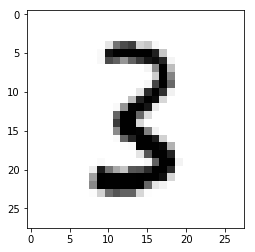

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 50000
print(y_train[image_index])
plt.imshow(x_train[image_index],cmap='Greys')

In [19]:

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [23]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [25]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.2051 - accuracy: 0.9375
Epoch 2/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0816 - accuracy: 0.9743
Epoch 3/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0551 - accuracy: 0.9824
Epoch 4/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.0422 - accuracy: 0.9860
Epoch 5/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0351 - accuracy: 0.9884
Epoch 6/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0276 - accuracy: 0.9906
Epoch 7/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0263 - accuracy: 0.9912
Epoch 8/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.0208 - accuracy: 0.9926
Epoch 9/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0185 - accuracy: 0.9934
Epoch

In [26]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 144us/sample - loss: 0.0682 - accuracy: 0.9848


[0.0682292963499919, 0.9848]

3


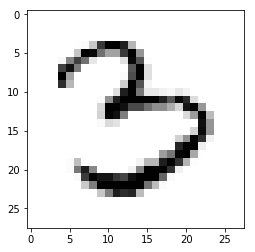

In [31]:
image_index = 2222
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')